#Downloads and Imports

In [ ]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
usa-real-estate-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import zipfile
df = pd.read_csv('usa-real-estate-dataset.zip',compression='zip')

#Preliminary Exploration of the data

In [ ]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
df.shape

(2226382, 12)

In [ ]:
# check duplicate
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
brokered_by,4533
status,0
price,1541
bed,481317
bath,511771
acre_lot,325589
street,10866
city,1407
state,8
zip_code,299


##Cleaning Data

Dealing with null values

which values should we get rid of?

should we compare houses that are new or have been sold before?

In [ ]:
# Mode imputation to handle missing value
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

In [ ]:
df = df.dropna(subset=['zip_code','city'])
df = df.drop('prev_sold_date', axis=1)

In [ ]:
# df_clean = df.dropna(subset = ['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'street', 'house_size'])
# df_clean.shape

(1354105, 12)

In [ ]:
df_clean.isnull().any()

,0
brokered_by,False
status,False
price,False
bed,False
bath,False
acre_lot,False
street,False
city,False
state,False
zip_code,False


Spliting if home has been sold previously

In [ ]:
df_clean["prev_sold"] = df_clean["prev_sold_date"].notnull()
df_clean.head()

<ipython-input-23-2f2c1ee8f55a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["prev_sold"] = df_clean["prev_sold_date"].notnull()


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,prev_sold
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN,False
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN,False
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN,False
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN,False
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN,False


In [ ]:
#this may be something we look into later?
df_newhomes = df_clean[df_clean['prev_sold'] == False]
df_newhomes.head() #this still has null values in other columns
df_newhomes.shape

(269196, 13)

In [ ]:
df_oldhomes = df_clean[df_clean['prev_sold'] == True]
df_oldhomes.head() #this also has null values still
df_oldhomes.shape

(1084909, 13)

#Some Graphs

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# !pip install plotly

In [ ]:
df_clean.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,prev_sold
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN,False
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN,False
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN,False
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN,False
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN,False


In [ ]:
# price's mean, median, min, max by state
state_stats = df_clean.groupby('state')['price'].agg(['mean', 'median', 'min', 'max']).sort_values('mean', ascending=False)
print(state_stats)

                              mean     median       min          max
state                                                               
Virgin Islands        1.947522e+06  1295000.0  100000.0   16999000.0
Hawaii                1.492711e+06   840000.0    2500.0   59500000.0
District of Columbia  1.209650e+06   899000.0  150000.0   20000000.0
California            1.092101e+06   725000.0    2550.0  515000000.0
Colorado              9.521606e+05   576355.0    4500.0   55000000.0
Utah                  9.151183e+05   600000.0   12000.0   48000000.0
Montana               8.638943e+05   499000.0   24999.0   30000000.0
Connecticut           7.905636e+05   399000.0   34900.0  100000000.0
Massachusetts         7.544013e+05   529900.0   10000.0   30000000.0
Nevada                7.518441e+05   497000.0   55000.0   47500000.0
Washington            7.273087e+05   575000.0     515.0   36000000.0
Wyoming               7.199630e+05   384950.0   10000.0   19500000.0
Guam                  7.175042e+05

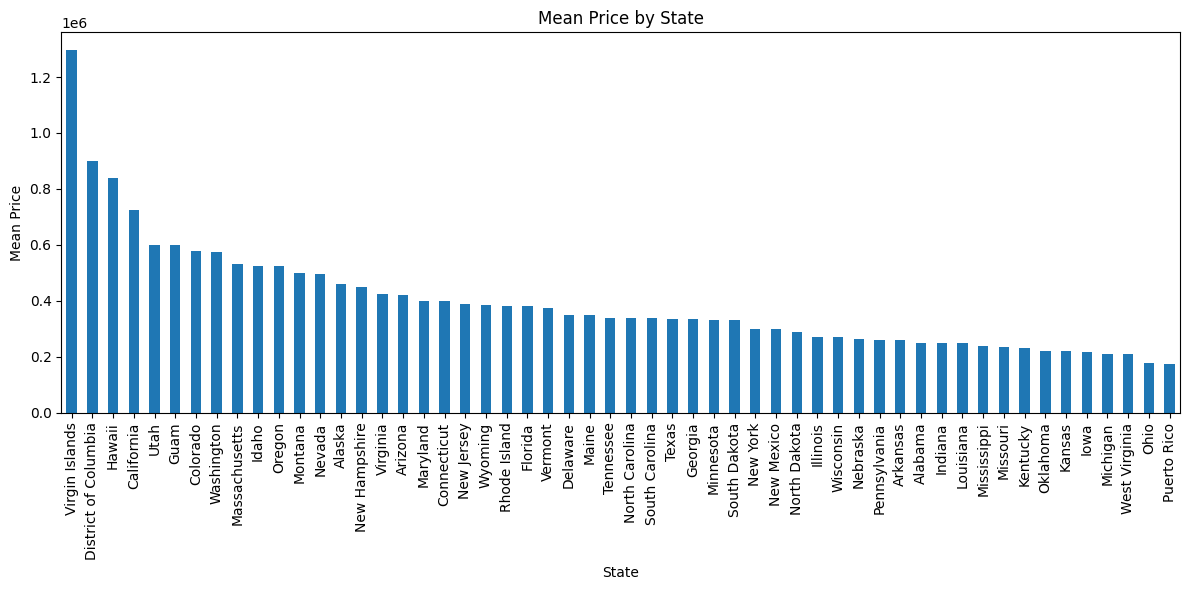

In [ ]:
state_mean_price = df_clean.groupby('state')['price'].median().sort_values(ascending = False)
plt.figure(figsize=(12, 6))
state_mean_price.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Mean Price')
plt.title('Mean Price by State')
plt.xticks()
plt.tight_layout()
plt.show()

In [ ]:
# counts of entry by state
state_counts = df_clean.groupby('state').size().sort_values(ascending=False)
state_counts

,0
state,
California,170089
Texas,145186
Florida,125715
Arizona,54462
Pennsylvania,51872
New York,50719
Georgia,49132
Illinois,46624
Washington,46299


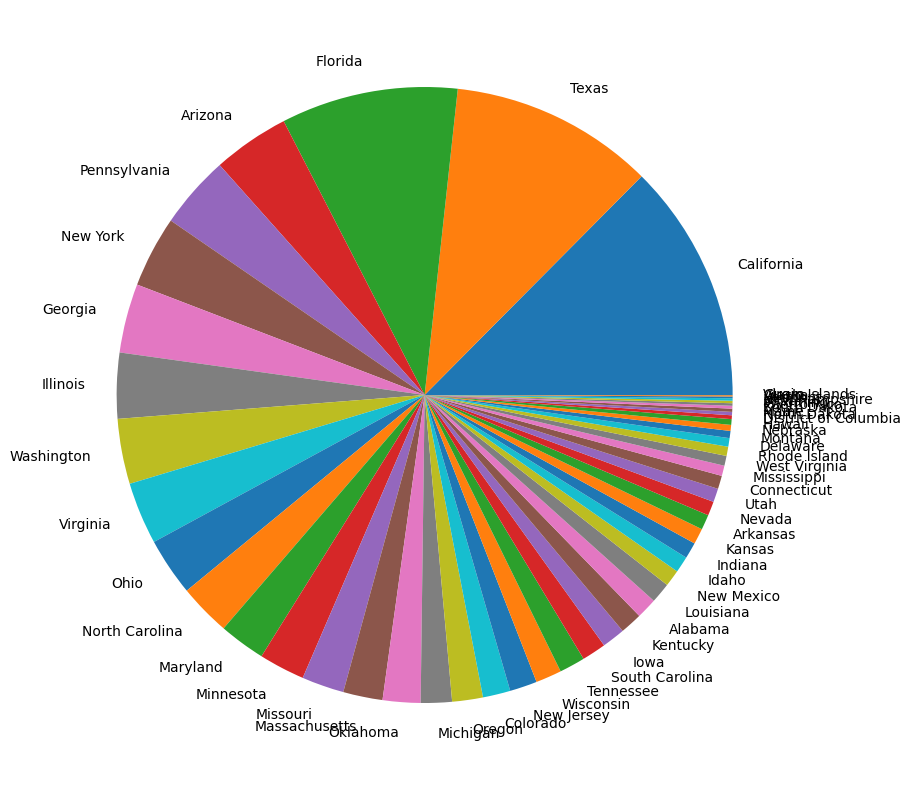

In [ ]:
# Plotting pie chart of counts of entry by state
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(data = state_counts, x= state_counts.values, labels = state_counts.index)
plt.show() #overlapping

<Axes: xlabel='price'>

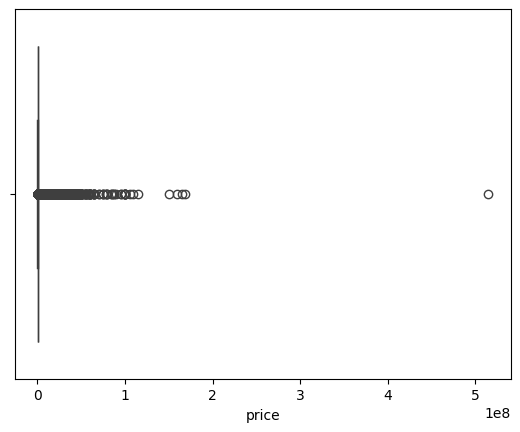

In [ ]:
# Checking distribution with boxplot
sns.boxplot(df_clean, x = 'price') # affected by outliers

<Axes: xlabel='price'>

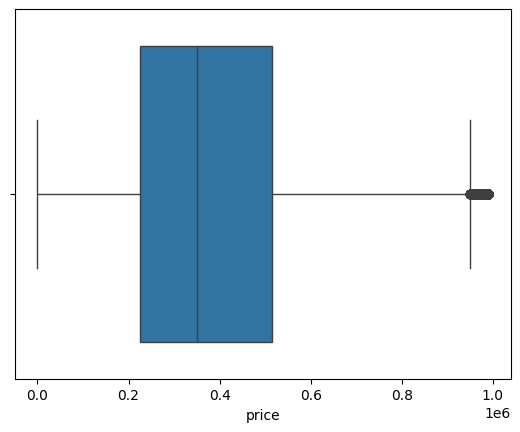

In [ ]:
# upper outlier removed
outlier_removed = df_clean.price.quantile(0.9)
sns.boxplot(df_clean[df_clean['price']<outlier_removed], x = 'price')

<Axes: xlabel='price', ylabel='state'>

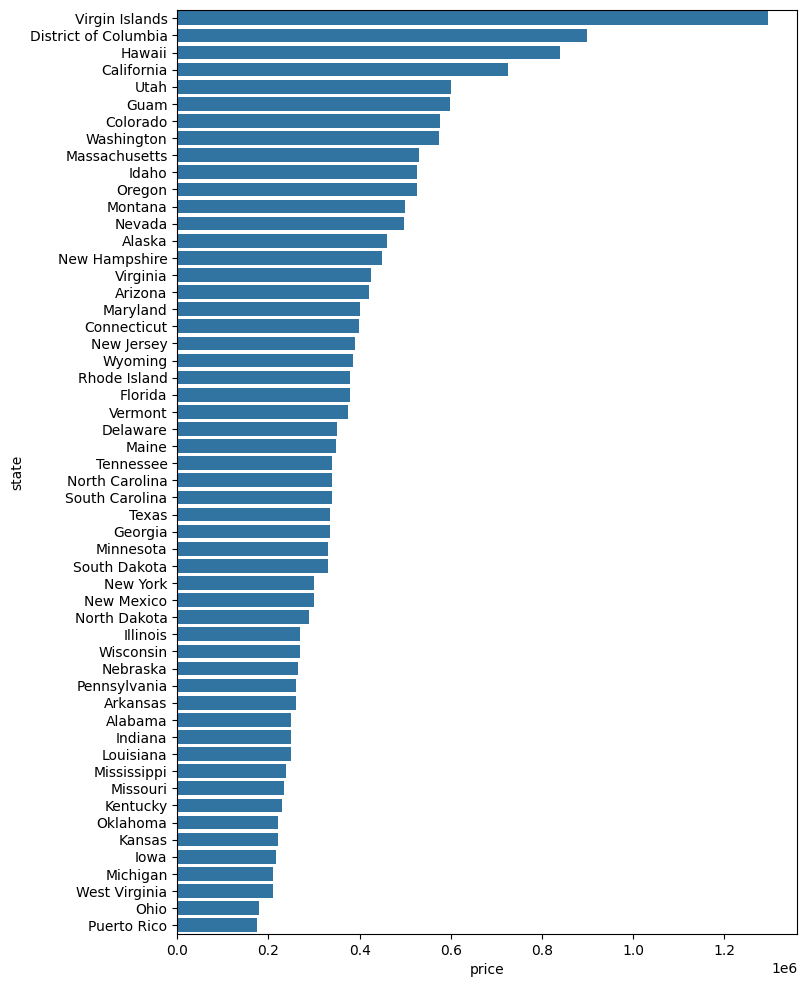

In [ ]:
# medians price by state
state_median = df_clean.groupby('state', as_index=False)['price'].median().sort_values('price', ascending=False)
fig, ax = plt.subplots(figsize=(8, 12))
sns.barplot(data = state_median, x = 'price', y = 'state')

<Axes: xlabel='price', ylabel='city-state'>

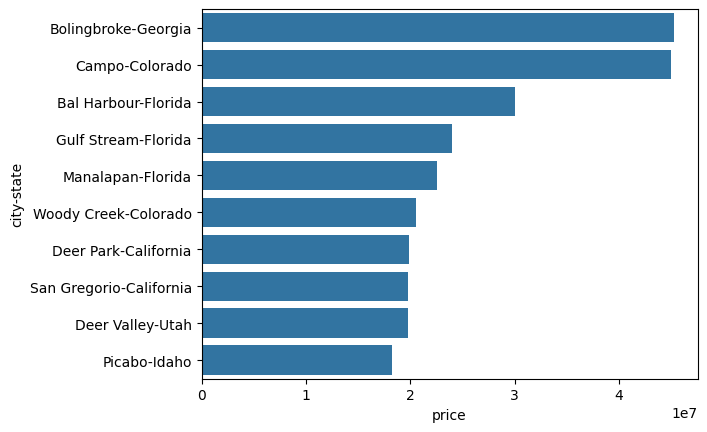

In [ ]:
# median price by state and city
city_median = df_clean.groupby(['city', 'state'], as_index=False)['price'].median().sort_values('price', ascending=False).head(10)
city_median['city-state'] = city_median['city'] + '-' + city_median['state']
# fig, ax = plt.subplots(figsize=(8, 12))
sns.barplot(data = city_median, x = 'price', y = 'city-state')

From states level, we can see that Virgin Island and District of Columbia are the two most expensive states.

For top 5 most expensive cities, we have one city from Georgia, three from Florida, and one from Colorado.

In [ ]:
pd.set_option("display.max_rows", None)
df_clean.bed.value_counts().sort_index()

,count
bed,
1.0,22817
2.0,191198
3.0,622319
4.0,372584
5.0,103095
6.0,26152
7.0,6233
8.0,4355
9.0,1774


<Axes: xlabel='bed', ylabel='price'>

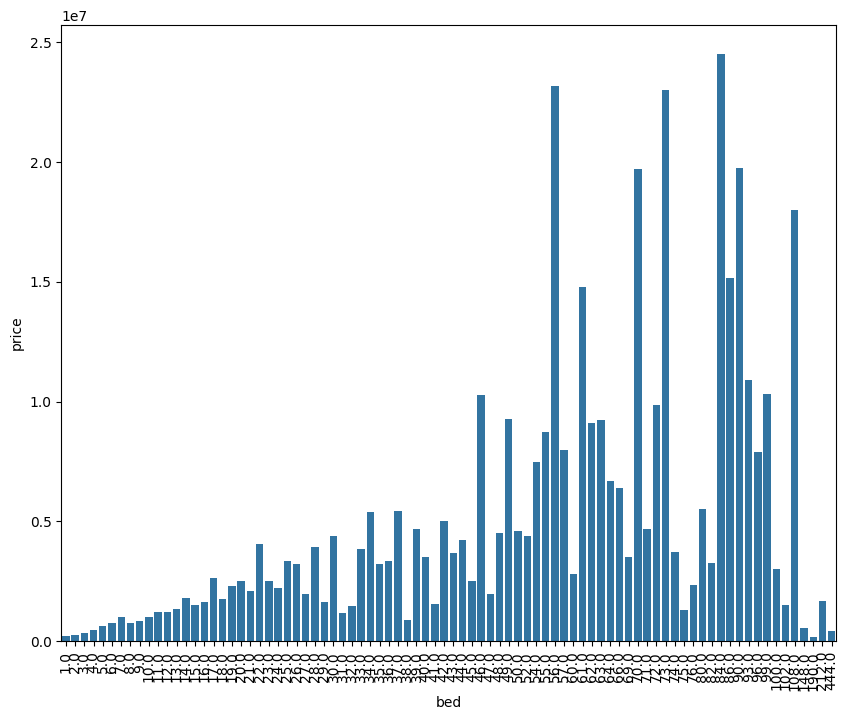

In [ ]:
# Check how num of beds affect the price
df2 = df_clean.copy()
# df2.loc[df2['bed']>=25, 'bed'] = 25
bed_price = df2.groupby('bed', as_index=False)['price'].median()
fig, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation=90)
sns.barplot(bed_price, x = 'bed', y = 'price')

In [ ]:
df2.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,prev_sold
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN,False
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN,False
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN,False
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN,False
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN,False


###Data preparation

In [ ]:
# drop previous sold date
col_to_drop = ['prev_sold_date']
df2 = df2.drop(col_to_drop, axis=1)

# Calculate frequency and map of each status
status_freq_encoding = df2['status'].value_counts(normalize=True)
df2['status'] = df2['status'].map(status_freq_encoding)

# Calculate frequency and map of each city
city_freq_encoding = df2['city'].value_counts(normalize=True)
df2['city'] = df2['city'].map(city_freq_encoding)

# Calculate frequency and map of each state
state_freq_encoding = df2['state'].value_counts(normalize=True)
df2['state'] = df2['state'].map(state_freq_encoding)

# change previous sold into 1(true) and 0(false)
df2.prev_sold = df2.prev_sold.replace({True: 1, False: 0})

<ipython-input-31-8b7723375d54>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.prev_sold = df2.prev_sold.replace({True: 1, False: 0})


<Axes: >

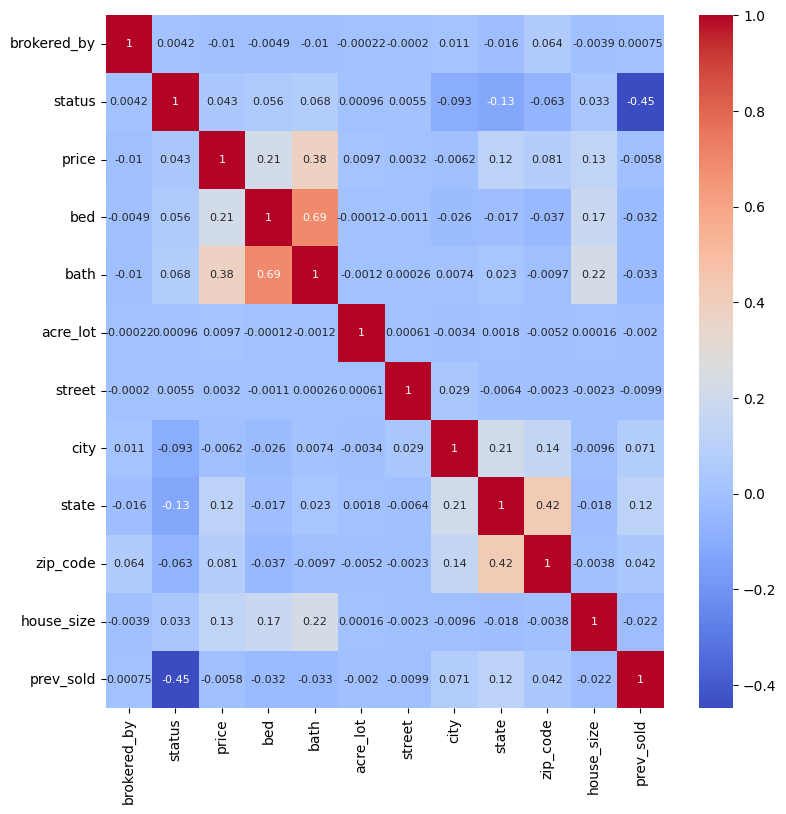

In [ ]:
# check correlation
corr_mx = df2.corr()
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_mx, annot = True, annot_kws={"size": 8}, cmap = 'coolwarm')

In [ ]:
# double check for null vakue
df2.isnull().sum()

,0
brokered_by,0
status,0
price,0
bed,0
bath,0
acre_lot,0
street,0
city,0
state,0
zip_code,0


In [ ]:
df2.head(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold
0,103378.0,0.551788,105000.0,3.0,2.0,0.12,1962661.0,0.000001,0.001306,601.0,920.0,0
1,52707.0,0.551788,80000.0,4.0,2.0,0.08,1902874.0,0.000001,0.001306,601.0,1527.0,0
2,103379.0,0.551788,67000.0,2.0,1.0,0.15,1404990.0,0.000009,0.001306,795.0,748.0,0
3,31239.0,0.551788,145000.0,4.0,2.0,0.10,1947675.0,0.000039,0.001306,731.0,1800.0,0
5,103378.0,0.551788,179000.0,4.0,3.0,0.46,1850806.0,0.000010,0.001306,612.0,2520.0,0
6,1205.0,0.551788,50000.0,3.0,1.0,0.20,1298094.0,0.000006,0.001306,639.0,2040.0,0
7,50739.0,0.551788,71600.0,3.0,2.0,0.08,1048466.0,0.000039,0.001306,731.0,1050.0,0
8,81909.0,0.551788,100000.0,2.0,1.0,0.09,734904.0,0.000039,0.001306,730.0,1092.0,0
9,65672.0,0.551788,300000.0,5.0,3.0,7.46,1946226.0,0.000003,0.001306,670.0,5403.0,0
10,52707.0,0.551788,89000.0,3.0,2.0,13.39,1902814.0,0.000016,0.001306,662.0,1106.0,0


In [ ]:
# Calculate IQR for each column
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df2 = df2[~((df2 < lower_bound) | (df2 > upper_bound)).any(axis=1)]

# Separate cleaned data back into X and y
X_clean = df2.drop('price', axis=1)  # replace 'target_column' with the actual target column name
y_clean = df2['price']  # replace 'target_column' with the actual target column name

In [ ]:
# scaled the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_clean)

##Build model

In [ ]:
# df_train, df_test = train_test_split(df_data,test_size = 0.1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=0)

In [ ]:
# linear regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

r_square1 = model1.score(X_train, y_train)
print('R square: ',r_square1)

R square:  0.353616286417862


In [ ]:
# decision tree
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

r_square2 = model2.score(X_train, y_train)
print('R square: ',r_square2)

R square:  0.9999978769395022


In [ ]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 14688709191.541487


In [ ]:
r_square2_pred = model2.score(X_test, y_test)
print('R square: ',r_square2_pred)

R square:  0.6977786196601123


In [ ]:
model2 = DecisionTreeRegressor(random_state=0)
param_grid = {'ccp_alpha': [0.0, 0.01, 0.02, 0.05, 0.1]}
grid_search = GridSearchCV(model2, param_grid, cv=2)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['ccp_alpha']

model2_pruned = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=0)
model2_pruned.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_pruned = model2_pruned.predict(X_test)

In [ ]:
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
print(f"Mean Squared Error (pruned): {mse_pruned}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error (pruned): 14683660063.084707
R-squared: 0.6977786196601123
